# 1. Import thư viện

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression

# 2. Tạo dữ liệu

In [2]:
numOfPoint = 30
noise = np.random.normal(0, 1, numOfPoint).reshape(-1, 1)
print(noise)

[[-0.08226803]
 [-2.01827079]
 [ 1.41471731]
 [-1.42736979]
 [ 1.5236574 ]
 [ 0.07876456]
 [-0.01100071]
 [-0.18668522]
 [-0.47031603]
 [-0.67440972]
 [ 0.34711557]
 [ 0.71992562]
 [ 0.42511474]
 [ 0.53845597]
 [ 0.56857713]
 [-0.24899799]
 [-0.911734  ]
 [ 0.37364676]
 [ 0.49633377]
 [-0.0404985 ]
 [-0.71866999]
 [ 1.03420681]
 [ 0.04990044]
 [-0.15005992]
 [-0.68143178]
 [ 0.89593584]
 [-0.11807019]
 [-0.09071088]
 [-0.74846919]
 [-0.66942214]]


In [3]:
x = np.linspace(30, 100, numOfPoint).reshape(-1, 1)
print(x)

[[ 30.        ]
 [ 32.4137931 ]
 [ 34.82758621]
 [ 37.24137931]
 [ 39.65517241]
 [ 42.06896552]
 [ 44.48275862]
 [ 46.89655172]
 [ 49.31034483]
 [ 51.72413793]
 [ 54.13793103]
 [ 56.55172414]
 [ 58.96551724]
 [ 61.37931034]
 [ 63.79310345]
 [ 66.20689655]
 [ 68.62068966]
 [ 71.03448276]
 [ 73.44827586]
 [ 75.86206897]
 [ 78.27586207]
 [ 80.68965517]
 [ 83.10344828]
 [ 85.51724138]
 [ 87.93103448]
 [ 90.34482759]
 [ 92.75862069]
 [ 95.17241379]
 [ 97.5862069 ]
 [100.        ]]


In [5]:
N = x.shape[0] # gán số hàng trong mảng x cho biến N. Trong trường hợp này, N sẽ bằng numOfPoint.

y = 15*x + 8 + 20*noise 
print(y)

[[ 456.35463948]
 [ 453.84148078]
 [ 558.70813922]
 [ 538.07329389]
 [ 633.30073415]
 [ 640.60977388]
 [ 675.02136502]
 [ 707.71457142]
 [ 738.24885177]
 [ 770.37387447]
 [ 827.011277  ]
 [ 870.67437444]
 [ 900.98505336]
 [ 939.45877456]
 [ 976.26809426]
 [ 996.12348851]
 [1019.07566473]
 [1080.99017667]
 [1119.65081329]
 [1145.12106456]
 [1167.76453117]
 [1239.02896374]
 [1255.54973304]
 [1287.75742219]
 [1313.33688165]
 [1381.09113053]
 [1397.01790659]
 [1433.77198938]
 [1456.82371963]
 [1494.61155724]]


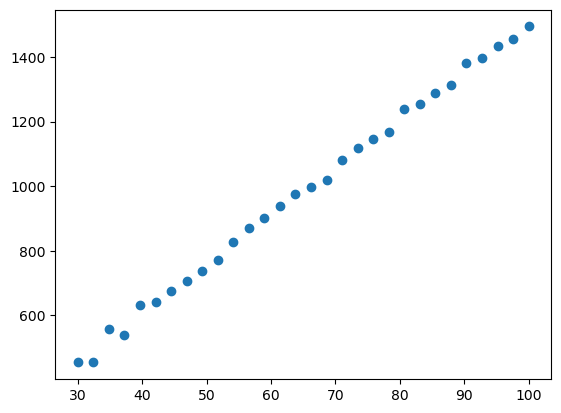

In [8]:
plt.scatter(x, y)

In [9]:
data = np.concatenate((x, y), axis=1)  # Ghép mảng x và y thành một mảng 2D

np.savetxt('data.csv', data, delimiter=',') 
# Lưu mảng data vào file data.csv với dấu phẩy (,) làm dấu phân cách 

# 3. Tiền xử lý

Text(0, 0.5, 'giá')

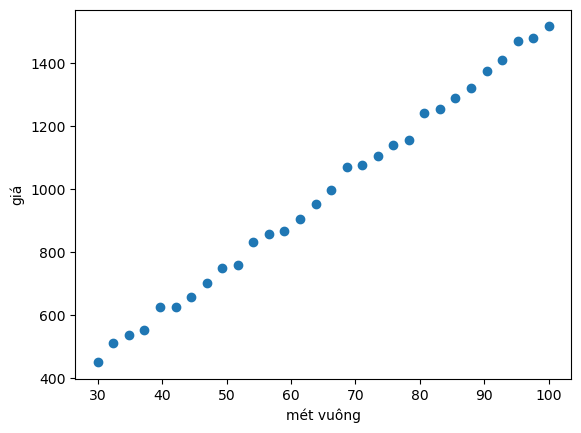

In [24]:
data = pd.read_csv('data_linear.csv').values 
N = data.shape[0] # số hàng trong mảng data, đại diện cho số điểm dữ liệu (30)
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

In [25]:
x = np.hstack((np.ones((N, 1)), x)) 
# Thêm một cột chứa các giá trị 1 vào mảng x bằng cách sử dụng hàm np.hstack, 
w = np.array([0.,1.]).reshape(-1, 1)
# Tạo một vector trọng số ban đầu w dưới dạng một vector cột, được khởi tạo với các giá trị [0, 1]

In [19]:
print(x)

[[  1.      30.    ]
 [  1.      32.4138]
 [  1.      34.8276]
 [  1.      37.2414]
 [  1.      39.6552]
 [  1.      42.069 ]
 [  1.      44.4828]
 [  1.      46.8966]
 [  1.      49.3103]
 [  1.      51.7241]
 [  1.      54.1379]
 [  1.      56.5517]
 [  1.      58.9655]
 [  1.      61.3793]
 [  1.      63.7931]
 [  1.      66.2069]
 [  1.      68.6207]
 [  1.      71.0345]
 [  1.      73.4483]
 [  1.      75.8621]
 [  1.      78.2759]
 [  1.      80.6897]
 [  1.      83.1034]
 [  1.      85.5172]
 [  1.      87.931 ]
 [  1.      90.3448]
 [  1.      92.7586]
 [  1.      95.1724]
 [  1.      97.5862]
 [  1.     100.    ]]


# 4. Train model

In [26]:
numOfIteration = 100
cost = np.zeros((numOfIteration, 1))
# tạo mảng cost với kích thước (100, 1) gồm toàn số 0, sử dụng để lưu giá trị của cost function khi train
learning_rate = 0.000001

In [21]:
print(cost)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [27]:
# Gradient descent
for i in range(1, numOfIteration): # vòng lặp huấn luyện
    r = np.dot(x, w) - y 
    # Biến r được tính toán bằng hiệu của tích vô hướng giữa x và w (x1w1 + x2w2 + ... + xiwi) và y. Đây là sai số dự đoán.
    # Phương trình đường thẳng có dạng y = ax+b ví dụ hình 3.3. Thay vì dùng kí hiệu a, b cho phương trình 
    # đường thẳng; để tiện cho biểu diễn ma trận phần sau ta sẽ thay w1 = a,w0 = b
    # Tức là nhà diện tích xi thực sự có giá yi. Còn giá trị mà model hiện tại đang dự đoán kí hiệu là yˆi = w1 ∗ xi +w0
    # y = w1 * x + w0 , y^i = w1 * xi + w0
    # r = y^i - yi (y^i là tích vô hướng giữa vector x và w, yi là y) = w0 + w1 *xi -yi

    cost[i] = 0.5*np.sum(r*r)
    # Gán giá trị của hàm chi phí (cost function) cho phần tử thứ i trong mảng cost. 
    # Hàm chi phí được tính bằng nửa tổng bình phương của r, đại diện cho bình phương sai số.
    # Công thức: 1/2 *  Σ(y^i-yi)**2 = 0.5 * Σ(w0 + w1 * xi - yi)^2 = 0.5*np.sum(r*r)

    # Dùng gradient descent để tìm trọng số (weight)
    # Gradient Descent: Gán x = x - learning_rate * f’(x)
    w[0] -= learning_rate*np.sum(r) # w[0] = w[0] - learning rate * Σ(y^i-yi)
    # Cập nhật trọng số đầu tiên (w[0]) bằng cách trừ đi learning_rate rồi nhân với tổng của r.
    # correct the shape dimension

    w[1] -= learning_rate*np.sum(np.multiply(r, x[:, 1].reshape(-1, 1))) 
    # Cập nhật trọng số thứ hai (w[1]) bằng cách trừ learning_rate nhân với tổng của tích element-wise giữa r và cột thứ hai của x.
    # w[1] = w[1] - learning rate * Σ(r ⊗ [[x1], [x2], ..., [xn]]) 

Find min: 
>$$J(w_0, w_1)=\frac{1}{2} * (\sum_{i=1}^N(\hat{y}_i-y_i)^2)$$ 

<=> Find min: 
>$$J(w_0, w_1)=\frac{1}{2} * (\sum_{i=1}^N(w_0+w_1*x_i-y_i)^2)$$ 

>$$\frac{dJ}{dw_0} = sum(\hat{y}-y)$$
>$$\frac{dJ}{dw_1} = sum(X[:, 1] ⊗ (\hat{y}-y))

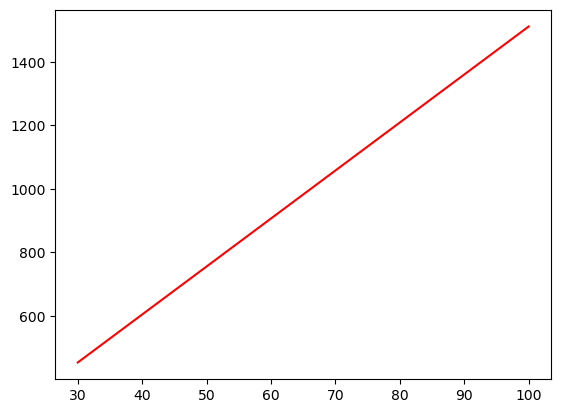

In [28]:
predict = np.dot(x, w) # predict chính là y^, tính bằng cách nhân ma trận X với vector trọng số w
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r') 
# vẽ đường thẳng với điểm đầu có tọa độ (x[0][1], y^[0]) điểm cuối là (x[29][1], y^[29]) 
# chính là các phần tử đầu và cuối của 2 ma trận
plt.show()

In [19]:
print(w[0])

[0.19473324]


In [7]:
x1 = 50
y1 = w[0] + w[1] * x1
print('Giá nhà cho 50m^2 là : ', y1)

Giá nhà cho 50m^2 là :  [2.57558315e+57]


In [35]:
np.save('weight.npy', w) 

# 5. Dùng LinearRegression ở thư viện sklearn

In [37]:
w = np.load('weight.npy')

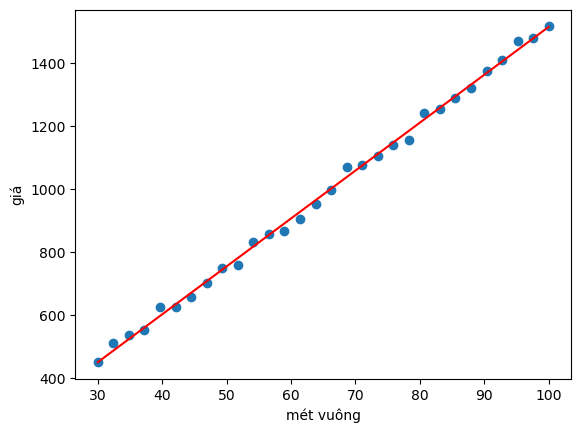

In [14]:
data = pd.read_csv('data_linear.csv').values
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
# tải dữ liệu và chia thành biến đầu vào x và biến mục tiêu y.

plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

# Tạo mô hình hồi quy tuyến tính
lrg = LinearRegression() # tạo instance của class LinearRegression

# Train mô hình với data giá đất
lrg.fit(x, y)

# Đoán giá nhà đất 
y_pred = lrg.predict(x)
# method predict() dùng để tạo ra các dự đoán (y_pred) cho biến (x) bằng cách sử dụng mô hình hồi quy tuyến tính(lrg).

plt.plot((x[0], x[-1]), (y_pred[0], y_pred[-1]), 'r') # [-1] chính là phần tử cuối cùng
plt.show()
# vẽ các điểm dữ liệu gốc dưới dạng điểm scatter và giá trị dự đoán (y_pred) dưới dạng một đường màu đỏ. 
# Biểu đồ kết quả sẽ hiển thị đường hồi quy tuyến tính biểu thị mối quan hệ giữa biến đầu vào (x) 
# và giá trị mục tiêu dự đoán (y_pred).

# Lưu nhiều tham số với numpy.savez(), định dạng '.npz'
np.savez('w2.npz', a=lrg.intercept_, b=lrg.coef_)
# The intercept value (giá trị chặn) is saved as a, and the coefficient value (giá trị hệ số) is saved as b.

# Lấy lại các tham số trong file .npz
k = np.load('w2.npz')
lrg.intercept_ = k['a']
lrg.coef_ = k['b']

# y = ax + b thì intercept là a, coef là b
# Giá trị chặn (intercept) được gán cho lrg.intercept_, và giá trị hệ số (coefficient) được gán cho lrg.coef_. 
# Điều này cho phép bạn khôi phục lại các tham số đã được lưu trữ trước đó cho mô hình hồi quy tuyến tính.

In [16]:
intercept = lrg.intercept_ #w0
coefficients = lrg.coef_ # w1

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: [-7.06426865]
Coefficients: [[15.2110908]]
